# Spark Core API

Apache Spark is a distributed system for processing big data. Its architecture is shown below.

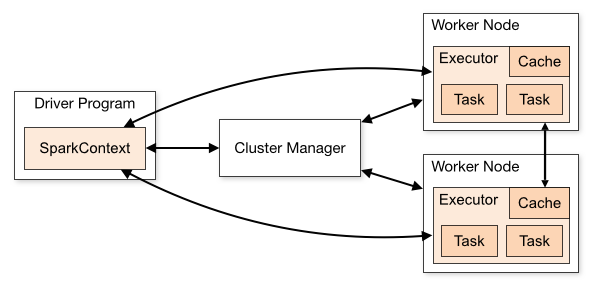

The driver program acts on behalf of the user and coordinates the various processes that comprise the framework via the `SparkContext` process, which corresponds to one application.

The cluster manager is in-charge of allocating resources in the cluster. It depends on the cluster itself and, except for the standalone cluster manager, is not really part of Spark per se but instead interacts with it. Spark supports the following cluster managers:

* Standalone – a simple cluster manager included with Spark that makes it easy to set up a cluster.
* Apache Mesos – a general cluster manager that can also run Hadoop MapReduce and service applications.
* Hadoop YARN – the resource manager in Hadoop 2.
* Kubernetes – an open-source system for automating deployment, scaling, and management of containerized applications.

Executors are the processes that actually perform the computation. They usually live in several worker nodes. Tasks are scheduled by the driver program and distributed across the executors. Executors may execute tasks from different applications but they run in different JVMs so cannot share data on memory directly. There can be several executors in a worker node. The driver and executors can also run on the same machine.

The driver and workers must be able to connect directly among each other.

Spark is written with Scala and runs on the JVM however it has support for Python. It also has several APIs. For this notebook, we will study the Spark Core API, the oldest and lowest-level API, which is based on RDDs. It is no longer recommended to use this API but it allows us to better understand the higher-level APIs and introduce general concepts on distributed computing.

## Resilient Distributed Dataset

notes:
 - Number of executors is **not** necessarily the same as number of cores


A resilient distributed dataset (RDD) is a collection of elements partitioned across the nodes of the cluster that can be operated on in parallel. They are created by starting with a file or an existing collection on memory, and transforming it.


To create an RDD, we need to first create a `SparkContext`.

In [1]:
from pyspark import SparkContext, SparkConf

sc = SparkContext('local[*]') # local mode, everything (the whole archi in fig1) is in the same machine. "[*]" means youre using all the cores. [n] uses n cores

22/01/29 17:50:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


The argument above creates a cluster that resides on the local machine and uses all of the available cores.

We can create an RDD by parallelizing a collection on memory.

In [2]:
import numpy as np
arr = sc.parallelize(np.random.rand(100))

The resulting array will be automatically partitioned into slices if the number of slices is not defined.

In [3]:
arr.getNumPartitions()

4

In [4]:
arr = sc.parallelize(np.random.rand(1000), 2)

In [5]:
arr.getNumPartitions()

2

The result is an RDD as shown.

In [6]:
arr

ParallelCollectionRDD[1] at readRDDFromFile at PythonRDD.scala:274

RDDs can be further transformed using its available methods, which can be either transformations or actions. RDDs actually represent a directed acyclic graph (DAG) of tasks and transformations further builds up the DAG. The resilience of RDD is due to this graph--the relevant parts of the DAG will be recomputed in case of failure. The DAG can be visualized using the Spark UI.

In [7]:
arr.map(lambda x: x**2)

PythonRDD[2] at RDD at PythonRDD.scala:53

Actions are methods that trigger the evaluation of the graph and return the results. An example of an action is `collect` which returns the values of the DAG.

In [8]:
arr.collect()

[0.06047431084735233,
 0.14644712642972135,
 0.1775427169041527,
 0.6992782030807518,
 0.45847805196630587,
 0.7006606293489857,
 0.9321378607580573,
 0.9273531019729162,
 0.8462329019610368,
 0.38558229559192825,
 0.3455191487072127,
 0.17224536473551666,
 0.6659326280065033,
 0.08403471580699529,
 0.3079434575994625,
 0.5135626981210054,
 0.6005691955320859,
 0.31295393737211374,
 0.8771133892315903,
 0.6052262813004998,
 0.2916577767614399,
 0.24808528022246212,
 0.6994158403212827,
 0.5183774769251801,
 0.7695982353213024,
 0.9130694897695619,
 0.7881477657767306,
 0.5897958867062919,
 0.7705617068952133,
 0.6603305504338214,
 0.7406809706853376,
 0.1330586163743318,
 0.28591728789584403,
 0.2938496869337863,
 0.14905487675971119,
 0.14626536620202912,
 0.032903403935258035,
 0.5264594941784619,
 0.18193450638060782,
 0.6655143126820783,
 0.7743707987917828,
 0.04402215677991261,
 0.38274338353907966,
 0.9830114182437953,
 0.04664068213158401,
 0.8551043652453342,
 0.91197848957377

In [9]:
arr.map(lambda x: x**2).collect()

[0.0036571422724621955,
 0.02144676083952279,
 0.0315214163257081,
 0.48899000530384523,
 0.21020212413481867,
 0.49092531751971663,
 0.8688809914586073,
 0.8599837757387899,
 0.7161101243613978,
 0.14867370667394114,
 0.11938348212335695,
 0.029668465672871167,
 0.44346626504364794,
 0.007061833460762464,
 0.09482917307831197,
 0.26374664490132693,
 0.3606833586220568,
 0.0979401669167089,
 0.7693278975693273,
 0.36629885157683173,
 0.0850642587454259,
 0.06154630626305756,
 0.489182517692326,
 0.26871520858331566,
 0.5922814438096629,
 0.8336958931480482,
 0.6211769006988522,
 0.3478591879756611,
 0.5937653441332646,
 0.4360364358362335,
 0.5486083003353739,
 0.0177045953914516,
 0.08174869551771496,
 0.08634763851108423,
 0.02221735628585269,
 0.021393557350213685,
 0.0010826339905267539,
 0.277159599010642,
 0.033100164611955425,
 0.44290930038469906,
 0.5996501340214239,
 0.0019379502875552061,
 0.14649249764294303,
 0.9663114483976779,
 0.00217535322969946,
 0.7312034754616259,
 

Be careful with actions since the results will be sent to the driver's memory and it could crash it if it runs out of memory. A safer approach is to only return up to a certain number of values using `take`.

In [10]:
arr.take(10)

[0.06047431084735233,
 0.14644712642972135,
 0.1775427169041527,
 0.6992782030807518,
 0.45847805196630587,
 0.7006606293489857,
 0.9321378607580573,
 0.9273531019729162,
 0.8462329019610368,
 0.38558229559192825]

In [11]:
arr.map(lambda x: x**2).take(10)

[0.0036571422724621955,
 0.02144676083952279,
 0.0315214163257081,
 0.48899000530384523,
 0.21020212413481867,
 0.49092531751971663,
 0.8688809914586073,
 0.8599837757387899,
 0.7161101243613978,
 0.14867370667394114]

## Working with key-value pair collections

Apache Spark was heavily inspired by Hadoop and one of Hadoop's strengths is in implementing MapReduce algorithms. These algorithms typically work with data that are in the form of key-value pair collections.

In [12]:
kv_pairs = sc.parallelize([
    ('foo', 1), ('bar', 4), ('baz', 3), ('bar', 2), ('baz', 2)
])

In [13]:
kv_pairs.getNumPartitions()

4

In [14]:
kv_pairs.collect()

[('foo', 1), ('bar', 4), ('baz', 3), ('bar', 2), ('baz', 2)]

The keys and values can be retrieved using `keys` and `values` although both of them are transformations.

In [15]:
kv_pairs.keys().collect()

['foo', 'bar', 'baz', 'bar', 'baz']

In [16]:
kv_pairs.values().collect()

[1, 4, 3, 2, 2]

### Map

The `map` method accepts a function that takes in each element of the RDD as input and outputs the value as an RDD.

In [17]:
kv_pairs.map(lambda x: (x[0]*2, x[1]**2)).collect()

[('foofoo', 1), ('barbar', 16), ('bazbaz', 9), ('barbar', 4), ('bazbaz', 4)]

If the key is to be retained, `mapValues` can be used instead.

In [18]:
kv_pairs.mapValues(lambda x: x**2).collect()

[('foo', 1), ('bar', 16), ('baz', 9), ('bar', 4), ('baz', 4)]

Sometimes it's better to work on the entire partition instead of each element. We use `mapPartitions` for that. The output of `mapPartitions` should be an iterable which corresponds to the new content of the partition. The number of elements need remain the same.

In [19]:
kv_pairs.mapPartitions(lambda x: [len(list(x))]).collect()

[1, 1, 1, 2]

To remove one level of nesting, we can use `flatMap`.

In [20]:
kv_pairs.flatMap(lambda x: (x[0]*2, x[1]**2)).collect()

['foofoo', 1, 'barbar', 16, 'bazbaz', 9, 'barbar', 4, 'bazbaz', 4]

To preserve the keys, we can use `flatMapValues` instead.

In [21]:
kv_pairs.mapValues(lambda x: [x]*2).collect()

[('foo', [1, 1]),
 ('bar', [4, 4]),
 ('baz', [3, 3]),
 ('bar', [2, 2]),
 ('baz', [2, 2])]

In [22]:
kv_pairs.flatMapValues(lambda x: [x]*2).collect()

[('foo', 1),
 ('foo', 1),
 ('bar', 4),
 ('bar', 4),
 ('baz', 3),
 ('baz', 3),
 ('bar', 2),
 ('bar', 2),
 ('baz', 2),
 ('baz', 2)]

In [23]:
kv_pairs?

### Reduce

The `reduce` method accepts a binary function and returns a single value. The function should be commutative and associative. The output of the input function is repeatedly paired with a remaining element until all elements are exhausted. **`reduce` is an action.**

In [24]:
kv_pairs.reduce(lambda x, y: (x[0]+y[0], x[1]*y[1]))

('foobarbazbarbaz', 48)

We can use `reduceByKey` instead to preserve keys. Unlike `reduce`, it is not an action.

In [25]:
kv_pairs.reduceByKey(lambda x, y: x*y).collect()

[('foo', 1), ('bar', 8), ('baz', 6)]

A more efficient implementation of `reduce` is `fold`. It performs the reduction within the partitions first before combining the results of all partitions.

In [26]:
kv_pairs.fold(('', 1), lambda x, y: (x[0]+y[0], x[1]*y[1]))

('foobarbazbarbaz', 48)

In [27]:
kv_pairs.foldByKey(1, lambda x, y: x*y).collect()

[('foo', 1), ('bar', 8), ('baz', 6)]

**Problem 1**

Create a function `itemfreq` that accepts an RDD of strings and returns an RDD of tuples where the first element is the string and the second element is the number of times that string is found in the RDD using map-reduce. Your code should be a single continuous RDD method call chain.

In [28]:
def itemfreq(rdd):
    return rdd.map(lambda x:(x,1)).reduceByKey(lambda x,y: (x+y))

In [29]:
from numpy.testing import (assert_equal, assert_array_equal, 
                           assert_array_almost_equal)
if_rdd = itemfreq(sc.parallelize(list(
    'ypdlrfcqxobtlhmnrhuivskghiftiqxhbicbtgbxungglgcqvr'
    'ncrhkakhqkbvpkqyeibashqkhbcbccyngnbrpuovxxsaddbdnl')))
if_dict = dict(if_rdd.collect())
assert_equal(len(if_dict), 23)
assert_equal(if_dict['a'], 3)
assert_equal(if_dict['b'], 10)
assert_equal(if_dict['c'], 7)
assert_equal(if_dict['d'], 4)
assert_equal(if_dict['e'], 1)

**Problem 2**

Create a function `tokenfreq` that accepts an RDD of strings and returns an RDD of tuples where the first element is a token and the second element is the number of times that token is found in the RDD using map-reduce. A token is a sequence of case-insensitive non-whitespace characters. Your code should be a single continuous RDD method call chain.

In [30]:
def tokenfreq(rdd):
    return (rdd.flatMap(lambda x: x.split())
            .map(lambda x: (x.lower(),1))
            .reduceByKey(lambda x,y: (x+y)))

In [31]:
tf_rdd = tokenfreq(sc.parallelize([
    'A ram sam sam a ram sam sam',
    'Guli guli guli guli guli ram sam',
    'A ram sam sam a ram sam sam',
    'Guli guli guli guli guli ram sam sam',
    'A rafiq a rafiq',
    'Guli guli guli guli guli ram sam sam',
    'A rafiq a rafiq',
    'Guli guli guli guli guli ram sam sam'
]))
tf_dict = dict(tf_rdd.collect())
assert_equal(len(tf_dict), 5)
assert_equal(tf_dict['a'], 8)
assert_equal(tf_dict['ram'], 8)

### Counting

The number of elements in the RDD can be returned using `count`. **This should be used instead of collecting then calling `len`.**

In [32]:
kv_pairs.count()

5

The occurrence of each unique key or item can be counted instead.

In [33]:
kv_pairs.countByKey()

defaultdict(int, {'foo': 1, 'bar': 2, 'baz': 2})

In [34]:
kv_pairs.countByValue()

defaultdict(int,
            {('foo', 1): 1,
             ('bar', 4): 1,
             ('baz', 3): 1,
             ('bar', 2): 1,
             ('baz', 2): 1})

### Group by

Values can also be grouped by a function.

In [35]:
kv_pairs.groupBy(lambda x: x[0][0]).collect()

[('b', <pyspark.resultiterable.ResultIterable at 0x7fc05d262160>),
 ('f', <pyspark.resultiterable.ResultIterable at 0x7fc082d71460>)]

In [36]:
kv_pairs.groupBy(lambda x: x[0][0]).mapValues(list).collect()

[('b', [('bar', 4), ('baz', 3), ('bar', 2), ('baz', 2)]), ('f', [('foo', 1)])]

There's also a method for grouping by keys.

In [37]:
kv_pairs.groupByKey().collect()

[('foo', <pyspark.resultiterable.ResultIterable at 0x7fc082d71370>),
 ('bar', <pyspark.resultiterable.ResultIterable at 0x7fc082d71190>),
 ('baz', <pyspark.resultiterable.ResultIterable at 0x7fc082d71100>)]

In [38]:
kv_pairs.groupByKey().mapValues(list).collect()

[('foo', [1]), ('bar', [4, 2]), ('baz', [3, 2])]

We can combine two RDDs according to their common keys using `cogroup`.

In [39]:
kv_pairs2 = sc.parallelize([
    ('bar', 1), ('barbaz', 8), ('bar', 4), ('baz', 5), ('bar', 3)
])

In [40]:
kv_pairs.cogroup(kv_pairs2).collect()

[('bar',
  (<pyspark.resultiterable.ResultIterable at 0x7fc082d785e0>,
   <pyspark.resultiterable.ResultIterable at 0x7fc082d786a0>)),
 ('foo',
  (<pyspark.resultiterable.ResultIterable at 0x7fc082d78670>,
   <pyspark.resultiterable.ResultIterable at 0x7fc082d78250>)),
 ('baz',
  (<pyspark.resultiterable.ResultIterable at 0x7fc082d78190>,
   <pyspark.resultiterable.ResultIterable at 0x7fc082d784f0>)),
 ('barbaz',
  (<pyspark.resultiterable.ResultIterable at 0x7fc082d78550>,
   <pyspark.resultiterable.ResultIterable at 0x7fc082d78400>))]

In [41]:
(kv_pairs
     .cogroup(kv_pairs2)
     .mapValues(lambda x: (list(x[0]), list(x[1])))
     .collect())

[('bar', ([4, 2], [1, 4, 3])),
 ('foo', ([1], [])),
 ('baz', ([3, 2], [5])),
 ('barbaz', ([], [8]))]

**Problem 3**

Create a function `combine_values` that takes two RDDs of key-value pairs and returns another RDD of key-value pairs where the value is the combined values for that key in either input RDD as a list. Your code should be a single continuous RDD method call chain.

In [42]:
def combine_values(pairs1, pairs2):
    return pairs1.cogroup(pairs2).mapValues(lambda x: list(x[0]) + list(x[1]))

In [43]:
cv_values = combine_values(kv_pairs, kv_pairs2)
cv_values_dict = dict(cv_values.collect())
assert_equal(len(cv_values_dict), 4)
assert_equal(cv_values_dict['bar'], [4, 2, 1, 4, 3])

If we just want to pair the $n$th elements of two RDDs, we can use `zip` for that.

In [44]:
kv_pairs.zip(kv_pairs2).collect()

[(('foo', 1), ('bar', 1)),
 (('bar', 4), ('barbaz', 8)),
 (('baz', 3), ('bar', 4)),
 (('bar', 2), ('baz', 5)),
 (('baz', 2), ('bar', 3))]

**Problem 4**

Create a function `combine` that accepts two RDDs of key-value pairs then combines the keys of each element into a tuple of keys, and the values of each element into a tuple of values, as an RDD. Your code should be a single continuous RDD method call chain.

In [45]:
def combine(pairs1, pairs2):
    return (pairs1.zip(pairs2)
            .map(lambda x: ((x[0][0], x[1][0]), (x[0][1], x[1][1]))))

In [46]:
c_list = sorted(combine(kv_pairs, kv_pairs2).collect())
assert_equal(len(c_list), 5)
assert_equal(
    c_list[:2],
    [(('bar', 'barbaz'), (4, 8)),
     (('bar', 'baz'), (2, 5))])

### Persisting

 - Why would you want to persist? Sometimes beneficial to store into disk first
 - disadvantage: may take a lot of storage

The entire DAG is evaluated everytime an action is called. This is obviously wasteful especially if it takes a long time to run and the same DAG or sub-DAG is called several times. One thing that we could do is to keep the results of the evaluated DAG on the workers such that anytime this DAG is called again, the previously evaluated results would be returned. We can do this using `persist`.

In [47]:
grouped_kv_pairs = kv_pairs.groupBy(lambda x: x[0][0]).mapValues(list)

In [48]:
grouped_kv_pairs

PythonRDD[94] at RDD at PythonRDD.scala:53

In [49]:
grouped_kv_pairs.is_cached

False

In [50]:
grouped_kv_pairs.persist()

PythonRDD[94] at RDD at PythonRDD.scala:53

In [51]:
grouped_kv_pairs.is_cached

True

In [52]:
grouped_kv_pairs.collect()

[('b', [('bar', 4), ('baz', 3), ('bar', 2), ('baz', 2)]), ('f', [('foo', 1)])]

In [53]:
grouped_kv_pairs.collect()

[('b', [('bar', 4), ('baz', 3), ('bar', 2), ('baz', 2)]), ('f', [('foo', 1)])]

By default, `persist` will persist into memory. We can also persist the results to disk or both memory and disk. If we want to persist to memory, we may use `cache` instead.

When we're done, we can `unpersist` the data.

In [54]:
grouped_kv_pairs.unpersist()

PythonRDD[94] at RDD at PythonRDD.scala:53

In [55]:
grouped_kv_pairs.is_cached

False

### Reading and writing text files

Spark can read various different formats on different storage devices. We look at how to read and write text files.

We use `textFile` to read one or more text files. It accepts a glob string.

In [56]:
texts = sc.textFile('sample*.txt')

Files will be concatenated if more than one file is being read. <u>There is no guaranteed order of files.</u>

In [57]:
texts.collect()

['foo 1',
 'bar 10',
 'baz 3',
 'eenie 2',
 'foo 4',
 'baz 6',
 'foo 3',
 'minie 4',
 'barbaz 2',
 'bar 7',
 'baz 8',
 'foo 4',
 'barbaz 9',
 'bar 2',
 'eenie 3',
 'minie 8',
 'baz 6',
 'bar 3',
 'eenie 4',
 'foo 4',
 'baz 2',
 'bar 1',
 'barbaz 6',
 'bar 3']

In [58]:
texts.count()

24

We can use `wholeTextFiles` if we want to keep the filepath of the file. It returns an RDD of key-value pairs where the key is the filepath and the value is the entire content of the file. Be careful when using this method since it reads the entire files into memory which could result in the executor running out of memory and crash.

In [59]:
texts_all = sc.wholeTextFiles('sample*.txt')

In [60]:
texts_all.collect()

[('file:/home/msds2022/jgacal/bdcc2022/spark-core-exercises/sample1.txt',
  'foo 1\nbar 10\nbaz 3\neenie 2\nfoo 4'),
 ('file:/home/msds2022/jgacal/bdcc2022/spark-core-exercises/sample2.txt',
  'baz 6\nfoo 3\nminie 4\nbarbaz 2'),
 ('file:/home/msds2022/jgacal/bdcc2022/spark-core-exercises/sample3.txt',
  'bar 7\nbaz 8\nfoo 4\nbarbaz 9\nbar 2\neenie 3\nminie 8'),
 ('file:/home/msds2022/jgacal/bdcc2022/spark-core-exercises/sample4.txt',
  'baz 6\nbar 3\neenie 4'),
 ('file:/home/msds2022/jgacal/bdcc2022/spark-core-exercises/sample5.txt',
  'foo 4\nbaz 2\nbar 1\nbarbaz 6\nbar 3')]

Text files can be saved using `saveAsTextFile` which will save each partition as a text file.

In [61]:
kv_pairs.getNumPartitions()

4

In [62]:
kv_pairs.mapPartitions(lambda x: [list(x)]).collect()

[[('foo', 1)], [('bar', 4)], [('baz', 3)], [('bar', 2), ('baz', 2)]]

In [63]:
!rm -rf sample-output
kv_pairs.saveAsTextFile('sample-output')

**Problem 5**

Create a function `add_all` that accepts a globstring of key-value files then returns an RDD of key-value pairs where the value is the sum of the values for that key in all files. Your code should be a single continuous RDD method call chain.

In [64]:
def add_all(files):
    return sc.textFile(files).map(lambda x: tuple(x.split())).reduceByKey(lambda x,y: int(x)+int(y))

In [65]:
a_dict = dict(add_all('sample*.txt').collect())
assert_equal(len(a_dict), 6)
assert_equal(a_dict['foo'], 16)

## Working with semi-structured data

Let us now demonstrate how to use the Spark Core API to work with semi-structured data. As an example, let us work with tweets that are stored in several compressed (`bz2`) files with each individual tweet stored as a single-line JSON.

In [66]:
tweets = sc.textFile('/mnt/data/public/twitter/sample/data-1909302*.json.bz2')

We use the `count` method to get the number of elements in an RDD. We do not `collect` then `len` since that is slower and potential cause the driver machine to run out of memory.

In [67]:
tweets.count()

232734

We call the `take` method to display the first $k$ elements of the RDD. It will automatically read more partitions as required to satisfy the requested $k$.

In [68]:
tweets.take(2)

['{"created_at": "Mon Sep 30 20:03:14 +0000 2019", "id": 1178762246899544069, "id_str": "1178762246899544069", "text": "@M_ALROKIBH https://t.co/pdEs8wgVUk", "display_text_range": [11, 11], "source": "<a href=\\"http://twitter.com/download/android\\" rel=\\"nofollow\\">Twitter for Android</a>", "truncated": false, "in_reply_to_status_id": 1178761074247716865, "in_reply_to_status_id_str": "1178761074247716865", "in_reply_to_user_id": 159466872, "in_reply_to_user_id_str": "159466872", "in_reply_to_screen_name": "Mohannad_Saeed", "user": {"id": 159466872, "id_str": "159466872", "name": "J.Zee.63", "screen_name": "Mohannad_Saeed", "location": "\\u0645\\u0643\\u0629 \\u0627\\u0644\\u0645\\u0643\\u0631\\u0645\\u0629, \\u0627\\u0644\\u0645\\u0645\\u0644\\u0643\\u0629 \\u0627\\u0644\\u0639\\u0631\\u0628\\u064a\\u0629 \\u0627", "url": null, "description": "Architect \\u060c 3d Lover", "translator_type": "none", "protected": false, "verified": false, "followers_count": 1259, "friends_count": 191

Let's look at the first 10 characters of the first 5 elements of the RDD.

In [69]:
tweets.map(lambda x: x[:10]).take(5)

['{"created_', '{"delete":', '{"delete":', '{"delete":', '{"delete":']

For us to more efficiently work with JSON data, we parse each element by passing it to `json.loads`. The resulting JSON object can then be indexed to extract the desired information. As an example, we extract the `user` information of each tweet. For this particular dataset however, not all elements have a `user` information so we assign a default value to avoid raising exceptions.

In [70]:
import json
tweets.map(json.loads).map(lambda x: x.get('user', {})).take(10)

[{'id': 159466872,
  'id_str': '159466872',
  'name': 'J.Zee.63',
  'screen_name': 'Mohannad_Saeed',
  'location': 'مكة المكرمة, المملكة العربية ا',
  'url': None,
  'description': 'Architect ، 3d Lover',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 1259,
  'friends_count': 1917,
  'listed_count': 8,
  'favourites_count': 1216,
  'statuses_count': 6701,
  'created_at': 'Fri Jun 25 13:07:27 +0000 2010',
  'utc_offset': None,
  'time_zone': None,
  'geo_enabled': True,
  'lang': None,
  'contributors_enabled': False,
  'is_translator': False,
  'profile_background_color': 'FFF04D',
  'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme19/bg.gif',
  'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme19/bg.gif',
  'profile_background_tile': False,
  'profile_link_color': '0099CC',
  'profile_sidebar_border_color': 'FFF8AD',
  'profile_sidebar_fill_color': 'F6FFD1',
  'profile_text_color': '333

To select deeper-level elements of the JSON data, chain the `get` calls.

In [71]:
(tweets.map(json.loads)
       .map(lambda x: x.get('user', {})
                       .get('screen_name', ''))
       .take(10))

['Mohannad_Saeed', '', '', '', '', '', '', '', '', 'itoga_iro']

To select particular elements based on some criteria, use the `filter` method which also requires a function argument similar to `map`. Only elements that evaluate to a `True` value when passed to the function are returned.

In [72]:
tweets.map(json.loads).filter(lambda x: 'user' not in x).count()

68734

For the next examples, we further reduce the dataset to make their runtime more manageable.

In [73]:
tweets2 = tweets.map(json.loads).sample(False, 0.05, 42)

RDDs have the `countByValue` method.

In [74]:
from operator import itemgetter
sorted(
    tweets2.map(lambda x: x.get('user', {}).get('screen_name', ''))
           .countByValue()
           .items(),
    key=itemgetter(1),
    reverse=True)[:10]

[('', 3461),
 ('mr_the2nd', 2),
 ('Allison90527681', 2),
 ('Jonatha42347791', 2),
 ('Busines65959783', 2),
 ('TheStoryLady', 2),
 ('zldabdel', 2),
 ('PhillipsNguyen9', 2),
 ('NoelleLuvsYa', 2),
 ('CllllB', 2)]

In [75]:
tweets2.map(lambda x: x.get('user', {}).get('screen_name', '')).countByValue().items()

dict_items([('Mohannad_Saeed', 1), ('', 3461), ('comentandoGH96', 1), ('gemheadass', 1), ('kinpiracpp_bot', 1), ('nifker13', 1), ('animegame_bot', 1), ('sushikoochi', 1), ('khailill', 1), ('VeteNovo', 1), ('driv3chaser', 1), ('arrobasubnormal', 1), ('_kyougo', 1), ('sippaibok_bot', 1), ('ciiciimiicii', 1), ('PornoxDia', 1), ('prouductions231', 1), ('DeceiverGreat', 1), ('15kem2', 1), ('chris_isdatahoe', 1), ('NvDHaRd', 1), ('enesardctp', 1), ('softchitten', 1), ('cheerybyenow', 1), ('DonLSRA', 1), ('KING___Mal', 1), ('ClayandJ', 1), ('Allan71097802', 1), ('MonnieCakess_', 1), ('luzgomez13', 1), ('ahmedalhimyari1', 1), ('afragilepoem', 1), ('unv1emp62', 1), ('Sha27102911', 1), ('MyThelist', 1), ('areantisgross', 1), ('_llauraas__', 1), ('carjizam', 1), ('Bangtanmanager7', 1), ('nfsotaebi', 1), ('ShangriLa_tte', 1), ('Countrylawyer99', 1), ('Djdusty2', 1), ('Asm_yon', 1), ('CrescendoSkies', 1), ('MRW_real_one', 1), ('antopiersantii', 1), ('lanzone_mirta', 1), ('TourguideBrahm', 1), ('Que

If the number of unique items is large then the memory of the driver may not be enough. What we can do instead is to count the items ourselves and just return the 10 most frequent items.

In [76]:
from operator import add
(tweets2.map(lambda x: x.get('user', {}).get('screen_name', ''))
        .map(lambda x: (x, 1))
        .reduceByKey(add)
        .top(10, key=itemgetter(1)))

[('', 3461),
 ('mr_the2nd', 2),
 ('Allison90527681', 2),
 ('Busines65959783', 2),
 ('zldabdel', 2),
 ('TheStoryLady', 2),
 ('PhillipsNguyen9', 2),
 ('starboyfest1', 2),
 ('Jonatha42347791', 2),
 ('NoelleLuvsYa', 2)]

The entire Spark DAG is evaluated every time an action is called. If there is a particular sequence of calls, which corresponds to a subgraph, that is being frequently called, then it would be better to store their result on memory so that the subgraph won't be evaluated next time. We do this by calling `persist`. 

Note that there should be sufficient memory or storage to store the subgraph results otherwise the call would fail. It should also be called on frequently used subgraphs only because the time and space overhead costs of `persist` are significant.

In [77]:
tweets3 = (tweets2.map(lambda x: x.get('user', {}).get('screen_name', ''))
                  .map(lambda x: (x, 1))
                  .reduceByKey(add)
                  .sortBy(itemgetter(1), ascending=False)
                  .persist())

In [78]:
tweets3.take(10)

[('', 3461),
 ('mr_the2nd', 2),
 ('Allison90527681', 2),
 ('Busines65959783', 2),
 ('zldabdel', 2),
 ('TheStoryLady', 2),
 ('PhillipsNguyen9', 2),
 ('starboyfest1', 2),
 ('Jonatha42347791', 2),
 ('NoelleLuvsYa', 2)]

RDDs can also be persisted to disk.

In [79]:
from pyspark import StorageLevel

tweets3 = (tweets2.map(lambda x: x.get('user', {}).get('screen_name', ''))
                  .map(lambda x: (x, 1))
                  .reduceByKey(add)
                  .sortBy(itemgetter(1), ascending=False)
                  .persist(StorageLevel.MEMORY_AND_DISK))

**Problem 6**

Create a function `friendliest` that accepts `tweets` and returns the `screen_name` and `friends_count` of the ten unique `screen_name`s with the most `friends_count`. Your code should be a single continuous RDD method call chain.

In [80]:
def friendliest(tweets):
    return (tweets
            .map(json.loads)
            .map(lambda x: x.get('user', {}))
            .filter(lambda x: ('screen_name' in x.keys())
                    and ('friends_count' in x.keys()))
            .map(lambda x: (x['screen_name'], x['friends_count']))
            .reduceByKey(lambda x,y: max(x,y))
            .sortBy(lambda x: -x[1])
            .take(10))

In [81]:
flist = friendliest(tweets)
assert_array_equal(flist[:5], 
                   [('8W88W', 1102946),
                    ('amola12200', 832745),
                    ('abl911', 513701),
                    ('jilevin', 504085),
                    ('p6_96', 387465)])

**Problem 7**

Create a function `hashiest` that accepts `tweets` and returns the `hashtag` and frequency of the ten most common hashtag. Your code should be a single continuous RDD method call chain.

In [82]:
def hashiest(tweets):
    from operator import add
    return(tweets
           .map(json.loads)
           .filter(lambda x: len(x.get('entities', {})
                                 .get('hashtags', [])) > 0)
           .map(lambda x: [a['text'] for a in x['entities']['hashtags']])
           .flatMap(lambda x:x)
           .map(lambda x: (x,1))
           .reduceByKey(add)
           .top(10, key=lambda x: x[1])
          )

In [83]:
hlist = hashiest(tweets)

assert_array_equal(hlist[:5],
                   [('PCAs', 413),
                    ('MPN', 396),
                    ('BTS', 248),
                    ('MUNARS', 171),
                    ('ARMYSelcaDay', 159)])

**Problem 8**

Create a function `geek_tweets` that accepts `tweets`, filters in tweets that have the case-insensitive word `geek` in the description them saves them as bzipped text files, one tweet in json format per line. The files should be stored under the directory `geek-tweets`. Your code should be a single continuous dask method call chain.

In [84]:
def geek_tweets(tweets):
    import re
    import json
    return(tweets.map(json.loads)
           .map(lambda x: (x, x.get('user', {}).get('description', None)))
           .map(lambda x: x[0] if (x[1] and re.search(r'\bgeek\b', x[1], re.I)) else False)
           .filter(lambda x: x)
           .map(lambda x: json.dumps(x))
           .saveAsTextFile('geek-tweets', 'org.apache.hadoop.io.compress.BZip2Codec')
          )

In [85]:
!rm -rf geek-tweets

geek_tweets(tweets)

import glob
assert_array_equal(sorted(glob.glob('geek-tweets/*.bz2')),
                   ['geek-tweets/part-00000.bz2',
                    'geek-tweets/part-00001.bz2',
                    'geek-tweets/part-00002.bz2',
                    'geek-tweets/part-00003.bz2'])
gtweets = sc.textFile('geek-tweets/*').map(json.loads).collect()
gtweets = sorted(gtweets, key=lambda x: x['id'])
assert_equal(len(gtweets), 212)
assert_equal(gtweets[0]['id'], 1178762263676612608)

## Working with Unstructured Data

Let us now demonstrate how to work with unstructured data by working with Project Gutenberg files.

In [86]:
texts = sc.textFile('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt') # you can specify number of partitions here (?)

We count the number of lines in all the books (text files) we read in.

In [87]:
texts.count()

609685

It's not guaranteed that each book corresponds to one partition but in this case, it does.

In [88]:
import glob
len(glob.glob('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt'))

96

In [89]:
texts.getNumPartitions()

96

Let's look at two lines.

In [90]:
texts.take(2)

["Project Gutenberg's History Of Modern Philosophy, by Richard Falckenberg",
 '']

Suppose we want to make the text of each book into a single line only. What we will do is to load the files into an RDD such that the key is the filepath and the file content is the value, which is already a single line string.

In [91]:
(sc.wholeTextFiles('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt')
   .mapValues(lambda x: x[:100])
   .take(10))

[('file:/mnt/data/public/gutenberg/1/1/1/0/11100/11100.txt',
  "Project Gutenberg's History Of Modern Philosophy, by Richard Falckenberg\r\n\r\nThis eBook is for the us"),
 ('file:/mnt/data/public/gutenberg/1/1/1/0/11101/11101.txt',
  "The Project Gutenberg EBook of Coleridge's Ancient Mariner and Select Poems\r\nby Samuel Taylor Coleri"),
 ('file:/mnt/data/public/gutenberg/1/1/1/0/11102/11102.txt',
  'The Project Gutenberg EBook of History of Negro Soldiers in the\r\nSpanish-American War, and Other Ite'),
 ('file:/mnt/data/public/gutenberg/1/1/1/0/11103/11103.txt',
  'The Project Gutenberg eBook, Atlantic Monthly Volume 6, No. 37, November,\r\n1860, by Various\r\n\r\n\r\nThi'),
 ('file:/mnt/data/public/gutenberg/1/1/1/0/11104/11104.txt',
  'The Project Gutenberg eBook, In Morocco, by Edith Wharton\r\n\r\n\r\nThis eBook is for the use of anyone a'),
 ('file:/mnt/data/public/gutenberg/1/1/1/0/11105/11105.txt',
  "Project Gutenberg's Jack Mason, The Old Sailor, by Theodore Thinker\r\n\r\

To combine all of the lines into one line, we can perform a reduce operation.

In [92]:
(sc.wholeTextFiles('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt')
   .values()
   .reduce(add))[:100]

"Project Gutenberg's History Of Modern Philosophy, by Richard Falckenberg\r\n\r\nThis eBook is for the us"

**Problem 9**

Create a function `count_tokens` that accepts a list of Project Gutenberg filepaths `fpaths` and returns a list of tuples consisting of the filepath and the number of tokens in each book, including headers and footers. A token is defined as a group of non-whitespace characters. Sort by increasing book ID. Your code should be a single continuous RDD method call chain.

In [93]:
def count_tokens(fpaths):
    import re
    return(sc.wholeTextFiles('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt')
         .mapValues(lambda x: len(x.strip().split()))
         .sortBy(lambda x: [int(y) for y in re.findall(r'(\d+)', x[0])]).collect())

In [94]:
import glob
token_counts = count_tokens('/mnt/data/public/gutenberg/1/1/1/*/*/?????.txt')

assert_equal(len(token_counts), 96)
assert_array_equal(
    token_counts[:10],
    [('file:/mnt/data/public/gutenberg/1/1/1/0/11100/11100.txt', 243729),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11101/11101.txt', 36479),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11102/11102.txt', 44876),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11103/11103.txt', 89587),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11104/11104.txt', 53843),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11105/11105.txt', 8506),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11106/11106.txt', 115056),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11107/11107.txt', 14580),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11108/11108.txt', 35843),
     ('file:/mnt/data/public/gutenberg/1/1/1/0/11109/11109.txt', 16937)])

**Problem 10**

Create a function `count_love` that reads `texts` and returns the number of occurences of the word `love` (case-insensitive, bounded by non-word characters) in all of the text. Your code should be a single continuous RDD method call chain.

In [95]:
def count_love(texts):
    import re
    from operator import add
    return (
        texts.map(lambda x: len(re.findall(r'\blove\b', x, re.I))).reduce(add)
    )

In [96]:
love_count = count_love(texts)

In [97]:
love_count

2477